In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [3]:
df = pd.read_csv('fashion-mnist.csv')

In [4]:
print(df.shape)

(10000, 785)


In [5]:
df = df.values

In [6]:
Y_train = df[:,0]
X_train = df[:,1:]

In [7]:
print(X_train.shape)
print(Y_train.shape)

(10000, 784)
(10000,)


In [8]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(10000, 10)


In [9]:
X_train = X_train.reshape((10000,28,28,1))

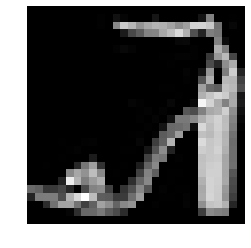

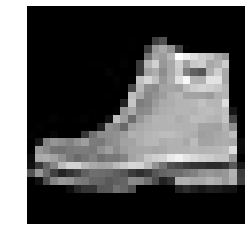

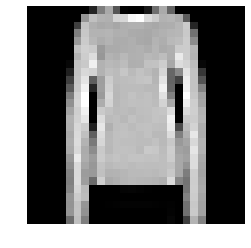

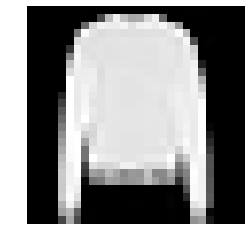

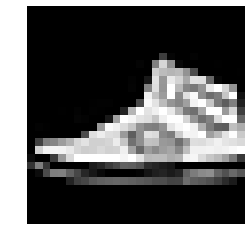

In [10]:
for i in range(5):
    idx = np.random.randint(0,10000)
    plt.imshow(X_train[idx].reshape((28,28)),cmap="gray")
    plt.axis("off")
    plt.show()

In [11]:
model = Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64,(5,5),activation='relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))          

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          102464    
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 32)          51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0

In [14]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [15]:
modelCheckpoint = ModelCheckpoint('model.h5',monitor='val_accuracy',verbose=1,save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy',min_delta=0.005,verbose=1,patience=10,restore_best_weights=True)
callbacks = [modelCheckpoint,earlyStopping]

In [ ]:
hist = model.fit(X_train,Y_train,batch_size=128,epochs=15,validation_split=0.2,callbacks=callbacks)

Train on 8000 samples, validate on 2000 samples
Epoch 1/15
7936/8000 [============================>.] - ETA: 0s - loss: 2.8206 - accuracy: 0.5421
Epoch 00001: val_accuracy improved from -inf to 0.73050, saving model to model.h5
8000/8000 [==============================] - 9s 1ms/sample - loss: 2.8035 - accuracy: 0.5437 - val_loss: 0.7553 - val_accuracy: 0.7305
Epoch 2/15
7936/8000 [============================>.] - ETA: 0s - loss: 0.7385 - accuracy: 0.7350
Epoch 00002: val_accuracy improved from 0.73050 to 0.75300, saving model to model.h5
8000/8000 [==============================] - 9s 1ms/sample - loss: 0.7370 - accuracy: 0.7355 - val_loss: 0.6325 - val_accuracy: 0.7530
Epoch 3/15
7936/8000 [============================>.] - ETA: 0s - loss: 0.6088 - accuracy: 0.7733
Epoch 00003: val_accuracy improved from 0.75300 to 0.80650, saving model to model.h5
8000/8000 [==============================] - 10s 1ms/sample - loss: 0.6082 - accuracy: 0.7736 - val_loss: 0.5382 - val_accuracy: 0.8065


In [ ]:
plt.title("loss")
plt.plot(hist.history['loss'],'g',label="loss")
plt.plot(hist.history['val_loss'],'r',label="val_loss")
plt.style.use('dark_background')
plt.legend()
plt.axis("off")
plt.show()

In [ ]:
plt.title("accuracy")
plt.title("accuracy vs loss")
plt.plot(hist.history['accuracy'],'g',label="accuracy")
plt.plot(hist.history['val_accuracy'],'r',label="val_accuracy")
plt.style.use('dark_background')
plt.legend()
plt.axis("off")
plt.show()

In [ ]:
loss,accuracy = model.evaluate(X_train,Y_train)

In [ ]:
print(accuracy)